In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("/Users/prateekb/Downloads/MyPrograms/Certification/WIP/Machine Learning/LinearRegression/FyntraCustomerData.csv")
df

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620146
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


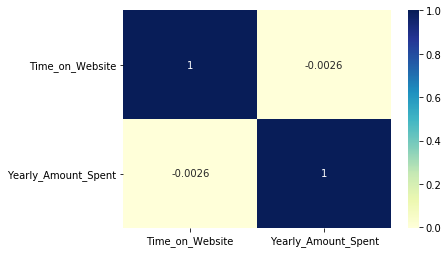

In [3]:
import seaborn as sns
reduceddf=df[['Time_on_Website','Yearly_Amount_Spent']]
correlation=reduceddf.corr()
sns.heatmap(correlation,cmap="YlGnBu",annot=True)
plt.yticks(rotation=0)
plt.show()

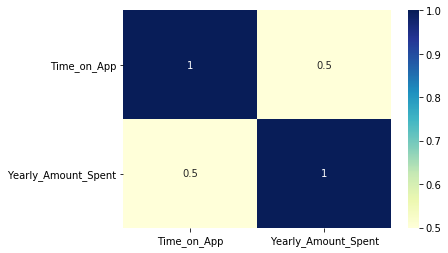

In [4]:
import seaborn as sns
reduceddf=df[['Time_on_App','Yearly_Amount_Spent']]
correlation=reduceddf.corr()
sns.heatmap(correlation,cmap="YlGnBu",annot=True)
plt.yticks(rotation=0)
plt.show()

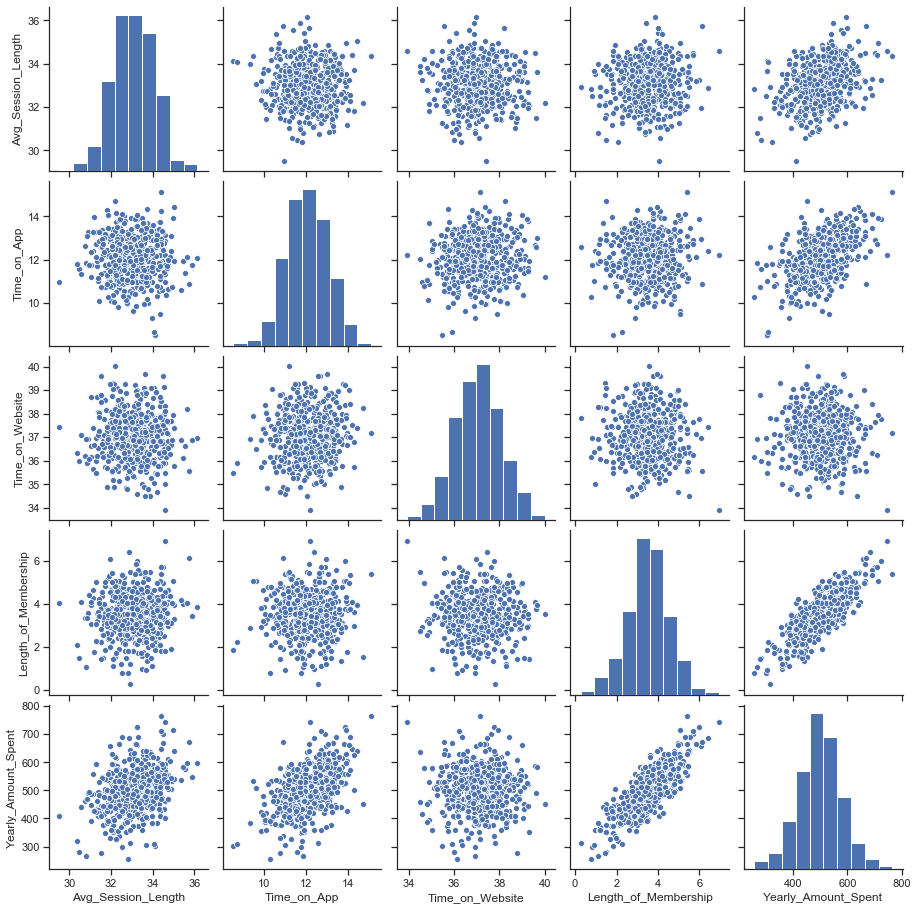

The most correlated feature with Yearly Amount Spent is (order descending) Length_of_Membership=>Time_on_App=>Avg_Session_Length=>Time_on_Website


In [5]:
sns.set(style='ticks')
sns.pairplot(df)
plt.show()
print("The most correlated feature with Yearly Amount Spent is (order descending) Length_of_Membership=>Time_on_App=>Avg_Session_Length=>Time_on_Website")

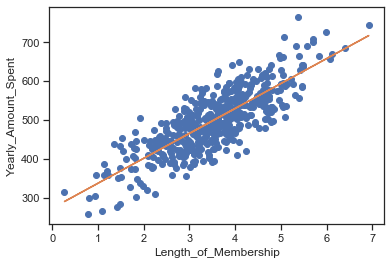

In [6]:
x=df['Length_of_Membership']
y=df['Yearly_Amount_Spent']
plt.plot(x,y,'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
plt.xlabel("Length_of_Membership")
plt.ylabel("Yearly_Amount_Spent")
plt.show()

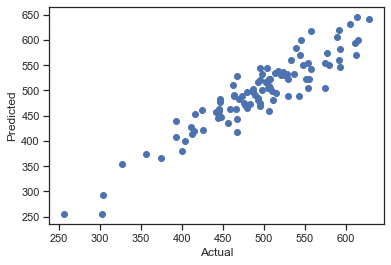

26.968710641639944
95.61767423514958


In [7]:
x=df[['Length_of_Membership','Time_on_App']]
y=df['Yearly_Amount_Spent']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=85)

from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,Y_train)
Y_pred=lm.predict(X_test)

plt.scatter(Y_test,Y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)
abse=np.mean(np.abs(Y_test-Y_pred)/Y_test)
accuracy=(1-abse)
print(accuracy*100)

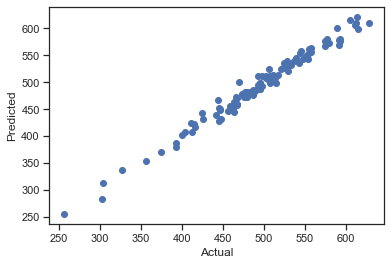

9.748641229131604
98.41787325775933


In [8]:
x=df[['Length_of_Membership','Time_on_Website','Avg_Session_Length','Time_on_App']]
y=df['Yearly_Amount_Spent']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=85)

from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,Y_train)
Y_pred=lm.predict(X_test)

plt.scatter(Y_test,Y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)
abse=np.mean(np.abs(Y_test-Y_pred)/Y_test)
accuracy=(1-abse)
print(accuracy*100)


In [49]:
cdf=pd.DataFrame(data=lm.coef_,columns=['Coefficient'] ,index = X_train.columns)
cdf

,Coefficient
Length_of_Membership,61.334694
Time_on_Website,0.682530
Avg_Session_Length,25.947252
Time_on_App,39.066821


In [9]:
lm.coef_.shape

(4,)

In [11]:
X_train.columns.shape

(4,)